<a href="https://colab.research.google.com/github/kmotyka00/Disney-Plus-Recommendation/blob/main/DisneyPlusExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recommendation System for Disney+ Movies and Series

## Disney+ Dataset Overview

### Download the dataset from Kaggle

#### Download kaggle library and change kaggle file permissions

In [51]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists


#### Download dataset and unzip csv files

In [52]:
!kaggle datasets download -d dgoenrique/disney-movies-and-tv-shows

disney-movies-and-tv-shows.zip: Skipping, found more recently modified local copy (use --force to force download)


In [53]:
! unzip disney-movies-and-tv-shows.zip

Archive:  disney-movies-and-tv-shows.zip
replace credits.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


### Import packages

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load and Explore data

In [55]:
def get_info(df):
  print(f"COLUMN NAMES AND DTYPES\n{df.dtypes}")
  print("\n\n DESCRIPTION OF NUMERICAL DATA:")
  print(df.describe())
  print("\n\n DATA INFO")
  print(df.info())
  print("\n\n UNIQUE VALUES NUMBER")
  print(df.nunique())

In [56]:
def min_max_range_normalization(df, col_name):
  df[col_name] = (df[col_name] - df[col_name].min()) / (df[col_name].max() - df[col_name].min())

### Titles data

#### First rows and data description

In [121]:
titles_data = pd.read_csv("titles.csv")

titles_data.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm89464,Miracle on 34th Street,MOVIE,"Kris Kringle, seemingly the embodiment of Sant...",1947,G,96,"['family', 'comedy', 'drama']",['US'],NaN,tt0039628,7.9,50969.0,23.515,7.388
1,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,G,68,"['horror', 'fantasy', 'animation', 'family', '...",['US'],NaN,tt0041094,6.9,16502.0,16.194,6.500
2,tm61052,Cinderella,MOVIE,Cinderella has faith her dreams of a better li...,1950,G,74,"['fantasy', 'animation', 'family', 'romance']",['US'],NaN,tt0042332,7.3,164292.0,93.547,7.035
3,tm87946,Dumbo,MOVIE,Dumbo is a baby elephant born with over-sized ...,1941,G,64,"['animation', 'drama', 'family', 'fantasy']",['US'],NaN,tt0033563,7.2,135045.0,54.265,6.999
4,tm74391,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,1941,G,119,"['animation', 'family', 'fantasy', 'music']",['US'],NaN,tt0032455,7.7,98764.0,43.609,7.382


In [122]:
get_info(titles_data)

COLUMN NAMES AND DTYPES
id                       object
title                    object
type                     object
description              object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
dtype: object


 DESCRIPTION OF NUMERICAL DATA:
       release_year      runtime     seasons   imdb_score    imdb_votes  \
count   1854.000000  1854.000000  540.000000  1339.000000  1.328000e+03   
mean    2006.193635    59.206580    2.618519     6.620687  6.961624e+04   
std       20.629561    38.566305    3.268281     1.066208  1.846213e+05   
min     1928.000000     1.000000    1.000000     1.600000  5.000000e+00   
25%     2002.000000    24.000000    1.000000     5.950000  3.267500e+02  

#### Missing data

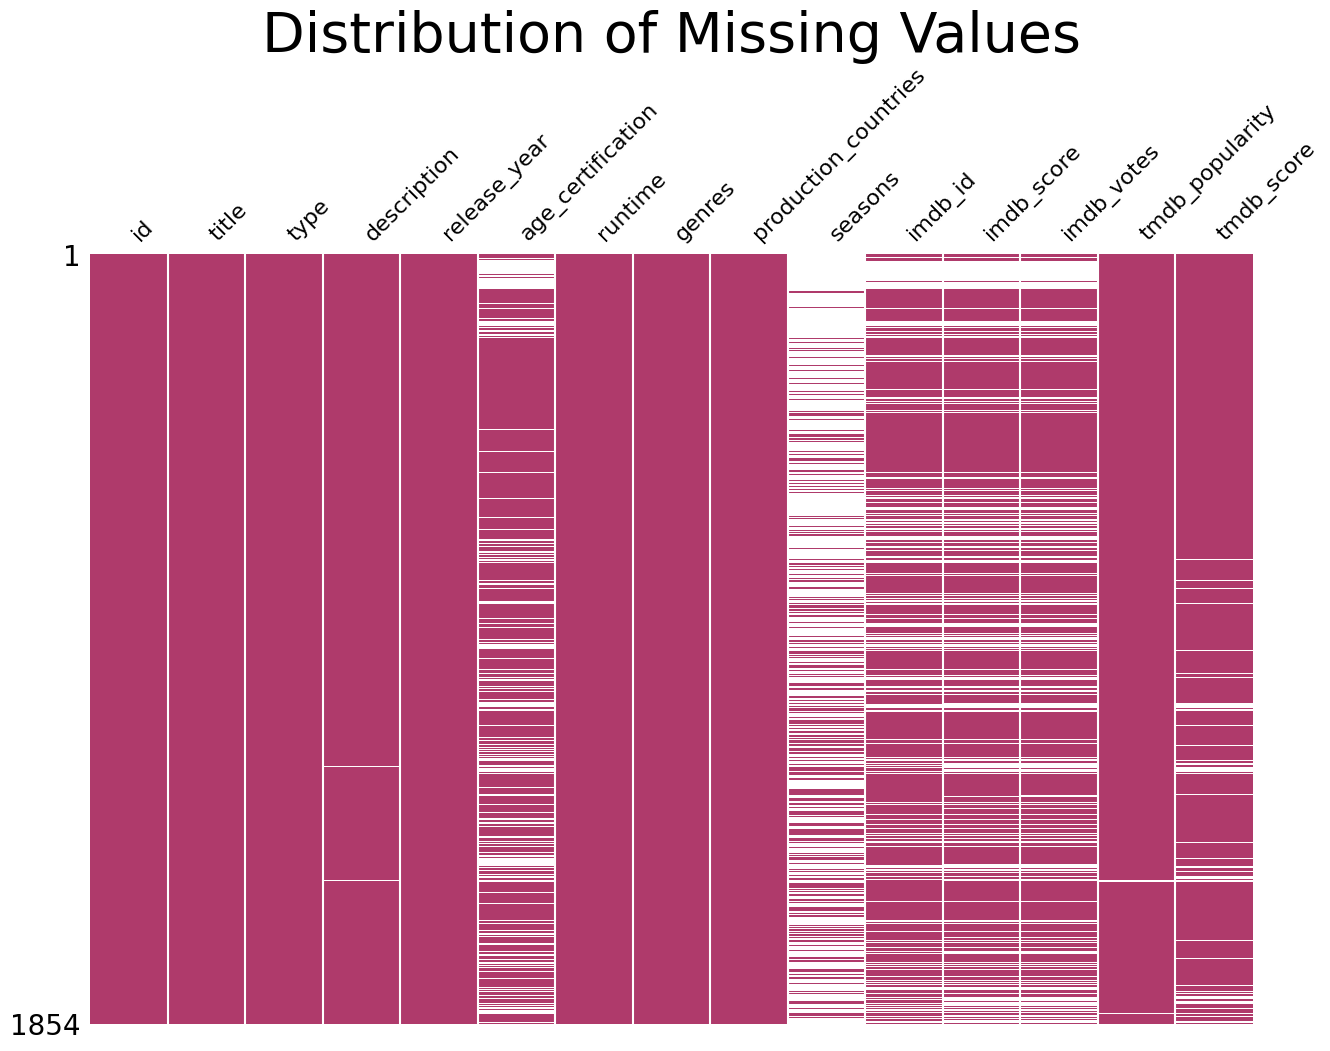

In [123]:
import missingno as msno

msno.matrix(titles_data, sparkline=False, figsize=(15,10), color=(0.69,0.23,0.42))
plt.title('Distribution of Missing Values', fontsize=40)
plt.show()

#### Drop id columns to reduce dimensionality

In [124]:
titles_data.drop(columns=["id", "imdb_id"], inplace=True)

#### Normalize numerical data

In [125]:
titles_data.head()

,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,Miracle on 34th Street,MOVIE,"Kris Kringle, seemingly the embodiment of Sant...",1947,G,96,"['family', 'comedy', 'drama']",['US'],NaN,7.9,50969.0,23.515,7.388
1,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,G,68,"['horror', 'fantasy', 'animation', 'family', '...",['US'],NaN,6.9,16502.0,16.194,6.500
2,Cinderella,MOVIE,Cinderella has faith her dreams of a better li...,1950,G,74,"['fantasy', 'animation', 'family', 'romance']",['US'],NaN,7.3,164292.0,93.547,7.035
3,Dumbo,MOVIE,Dumbo is a baby elephant born with over-sized ...,1941,G,64,"['animation', 'drama', 'family', 'fantasy']",['US'],NaN,7.2,135045.0,54.265,6.999
4,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,1941,G,119,"['animation', 'family', 'fantasy', 'music']",['US'],NaN,7.7,98764.0,43.609,7.382


In [126]:
for numerical_column in titles_data.select_dtypes(include=['int', 'float']).columns.tolist():
  min_max_range_normalization(titles_data, numerical_column)

titles_data.head()

,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,Miracle on 34th Street,MOVIE,"Kris Kringle, seemingly the embodiment of Sant...",0.200000,G,0.524862,"['family', 'comedy', 'drama']",['US'],NaN,0.797468,0.036306,0.010615,0.673500
1,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,0.231579,G,0.370166,"['horror', 'fantasy', 'animation', 'family', '...",['US'],NaN,0.670886,0.011752,0.007224,0.562500
2,Cinderella,MOVIE,Cinderella has faith her dreams of a better li...,0.231579,G,0.403315,"['fantasy', 'animation', 'family', 'romance']",['US'],NaN,0.721519,0.117034,0.043055,0.629375
3,Dumbo,MOVIE,Dumbo is a baby elephant born with over-sized ...,0.136842,G,0.348066,"['animation', 'drama', 'family', 'fantasy']",['US'],NaN,0.708861,0.096199,0.024859,0.624875
4,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,0.136842,G,0.651934,"['animation', 'family', 'fantasy', 'music']",['US'],NaN,0.772152,0.070354,0.019923,0.672750


#### One hot encoding for genres types

In [127]:
import ast
# Get a list of unique genres
titles_data['genres'] = titles_data['genres'].apply(ast.literal_eval)
genres_list = sorted(set([genre for row in titles_data['genres'] for genre in row]))

# Create binary columns for each genre
for genre in genres_list:
    titles_data[genre] = titles_data['genres'].apply(lambda x: 1 if genre in x else 0)

# Drop the original 'genres' column
titles_data.drop(columns=['genres'], inplace=True)
titles_data.head()

,title,type,description,release_year,age_certification,runtime,production_countries,seasons,imdb_score,imdb_votes,...,history,horror,music,reality,romance,scifi,sport,thriller,war,western
0,Miracle on 34th Street,MOVIE,"Kris Kringle, seemingly the embodiment of Sant...",0.200000,G,0.524862,['US'],NaN,0.797468,0.036306,...,0,0,0,0,0,0,0,0,0,0
1,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,0.231579,G,0.370166,['US'],NaN,0.670886,0.011752,...,0,1,0,0,0,0,0,0,0,0
2,Cinderella,MOVIE,Cinderella has faith her dreams of a better li...,0.231579,G,0.403315,['US'],NaN,0.721519,0.117034,...,0,0,0,0,1,0,0,0,0,0
3,Dumbo,MOVIE,Dumbo is a baby elephant born with over-sized ...,0.136842,G,0.348066,['US'],NaN,0.708861,0.096199,...,0,0,0,0,0,0,0,0,0,0
4,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,0.136842,G,0.651934,['US'],NaN,0.772152,0.070354,...,0,0,1,0,0,0,0,0,0,0


Check number of non zero values in each genre column

In [128]:
titles_data[titles_data.columns[12:]].astype(bool).sum(axis=0)

action           375
animation        530
comedy           751
crime             64
documentation    520
drama            415
european          40
family           837
fantasy          414
history           52
horror            37
music            124
reality          101
romance          155
scifi            304
sport             72
thriller          73
war                9
western           26
dtype: int64

#### Remove more columns 

In [129]:
titles_data.drop(columns=["age_certification", "seasons"], inplace=True)

In [130]:
# Get a list of unique genres
titles_data['production_countries'] = titles_data['production_countries'].apply(ast.literal_eval)
genres_list = sorted(set([genre for row in titles_data['production_countries'] for genre in row]))
print(len(genres_list))

44


I think it is not worth adding 44 columns to keep the production country information, maybe later I will code it into GB/US INDIA and SMALLER_COUNTRIES or something

In [131]:
titles_data.drop(columns="production_countries", inplace=True)

In [132]:
titles_data.head()

,title,type,description,release_year,runtime,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,action,...,history,horror,music,reality,romance,scifi,sport,thriller,war,western
0,Miracle on 34th Street,MOVIE,"Kris Kringle, seemingly the embodiment of Sant...",0.200000,0.524862,0.797468,0.036306,0.010615,0.673500,0,...,0,0,0,0,0,0,0,0,0,0
1,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,0.231579,0.370166,0.670886,0.011752,0.007224,0.562500,0,...,0,1,0,0,0,0,0,0,0,0
2,Cinderella,MOVIE,Cinderella has faith her dreams of a better li...,0.231579,0.403315,0.721519,0.117034,0.043055,0.629375,0,...,0,0,0,0,1,0,0,0,0,0
3,Dumbo,MOVIE,Dumbo is a baby elephant born with over-sized ...,0.136842,0.348066,0.708861,0.096199,0.024859,0.624875,0,...,0,0,0,0,0,0,0,0,0,0
4,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,0.136842,0.651934,0.772152,0.070354,0.019923,0.672750,0,...,0,0,1,0,0,0,0,0,0,0


#### Coding type information

In [133]:
titles_data['is_movie'] = (titles_data['type'] == 'MOVIE').astype(int)
titles_data.drop(columns="type", inplace=True)

In [134]:
titles_data.head()

,title,description,release_year,runtime,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,action,animation,...,horror,music,reality,romance,scifi,sport,thriller,war,western,is_movie
0,Miracle on 34th Street,"Kris Kringle, seemingly the embodiment of Sant...",0.200000,0.524862,0.797468,0.036306,0.010615,0.673500,0,0,...,0,0,0,0,0,0,0,0,0,1
1,The Adventures of Ichabod and Mr. Toad,The Wind in the Willows: Concise version of Ke...,0.231579,0.370166,0.670886,0.011752,0.007224,0.562500,0,1,...,1,0,0,0,0,0,0,0,0,1
2,Cinderella,Cinderella has faith her dreams of a better li...,0.231579,0.403315,0.721519,0.117034,0.043055,0.629375,0,1,...,0,0,0,1,0,0,0,0,0,1
3,Dumbo,Dumbo is a baby elephant born with over-sized ...,0.136842,0.348066,0.708861,0.096199,0.024859,0.624875,0,1,...,0,0,0,0,0,0,0,0,0,1
4,Fantasia,Walt Disney's timeless masterpiece is an extra...,0.136842,0.651934,0.772152,0.070354,0.019923,0.672750,0,1,...,0,1,0,0,0,0,0,0,0,1


### Credits data

In [62]:
credits_data = pd.read_csv("credits.csv")

credits_data.head()

,person_id,id,name,character,role
0,35549,tm89464,Maureen O'Hara,Doris Walker,ACTOR
1,57832,tm89464,John Payne,Fred Gailey,ACTOR
2,57833,tm89464,Edmund Gwenn,Kris Kringle,ACTOR
3,25096,tm89464,Natalie Wood,Susan Walker,ACTOR
4,27185,tm89464,Porter Hall,Granville Sawyer,ACTOR


In [63]:
credits_data.head()

,person_id,id,name,character,role
0,35549,tm89464,Maureen O'Hara,Doris Walker,ACTOR
1,57832,tm89464,John Payne,Fred Gailey,ACTOR
2,57833,tm89464,Edmund Gwenn,Kris Kringle,ACTOR
3,25096,tm89464,Natalie Wood,Susan Walker,ACTOR
4,27185,tm89464,Porter Hall,Granville Sawyer,ACTOR


## Simplest Recommendation System based on titles simialiry (Content-Based filtering)

#### Encoding titles - bag of words

In [135]:
from sklearn.feature_extraction.text import CountVectorizer

In [136]:
vectorizer = CountVectorizer()

# Fit the vectorizer on the title column
vectorizer.fit(titles_data['title'])

CountVectorizer()

In [137]:
title_bow = vectorizer.transform(titles_data['title'])

In [138]:
print('Vocabulary:', len(vectorizer.vocabulary_))
print('Bag of words representation:\n', title_bow.toarray())

Vocabulary: 2323
Bag of words representation:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### Encoding titles - tokenization, stemming, vectorization

#### Needed packages

In [158]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import nltk
nltk.download('punkt')
nltk.download("stopwords")
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#### Tokenization, removing stop words, stemming, vectorization

In [171]:
# Tokenize the movie titles
tokens = titles_data['title'].apply(lambda x: x.lower()).apply(word_tokenize)

# Remove Stop Words
stop_words = set(stopwords.words('english'))
tokens_no_stop_words = tokens.apply(lambda x: [word for word in x if word not in stop_words])

# Stem the movie title tokens
stemmer = PorterStemmer()
stemmed = tokens_no_stop_words.apply(lambda x: [stemmer.stem(word) for word in x])

# # Vectorize the stemmed movie titles using TF-IDF
tfidf = TfidfVectorizer(analyzer=lambda x: x)
tfidf_matrix = tfidf.fit_transform(stemmed)

(1854, 2093)


### Function making recomendations

In [175]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate the cosine similarity between movies based on their TF-IDF vectors
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(cosine_sim.shape)
# Define a function to get the top N similar movies for a given movie
def get_top_similar_movies(title, cosine_sim=cosine_sim, df=titles_data, top_n=10):
    # Get the index of the movie with the given title
    idx = titles_data[titles_data['title'] == title].index[0]

    # Get the pairwise cosine similarity scores for the movie with the given index
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies by cosine similarity scores in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the indices of the top N similar movies
    sim_indices = [i[0] for i in sim_scores[1:top_n+1]]

    # Return the titles of the top N similar movies
    return df['title'].iloc[sim_indices].tolist()

(1854, 1854)


In [174]:
get_top_similar_movies("Miracle on 34th Street")

['Miracle on 34th Street',
 'Miracle',
 'Of Miracles and Men',
 '101 Dalmatian Street',
 'Miracle at Midnight',
 'Full-Court Miracle',
 'Once Upon a Main Street',
 'Miracle in Lane 2',
 'Miracle Landing on the Hudson',
 'The Adventures of Ichabod and Mr. Toad']